In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt

In [19]:
location = r'D:\AI-DATASETS\02-PROJECT-DATA\DXC\Copy of Data Sample.xlsx'

In [8]:
df = pd.read_excel(location)

In [9]:
df.shape

(8448, 28)

In [10]:
df.columns

Index(['Ticket ID', 'Month', 'Site', 'Opened', 'Assigned to',
       'Assignment group', 'Owner group', 'Status', 'Opened by', 'Severity',
       'Service', 'Contact type', 'Service Offering', 'Type', 'Category',
       'Configuration item', 'Created', 'Resolved', 'Closed',
       'Caller Department', 'Short description', 'Translation ',
       'KB Article Used', 'Caller Notes', 'Region', 'Reassignment count',
       'Product', 'Issues'],
      dtype='object')

In [11]:
df_trimmed = df[['Translation ', 'Product', 'Issues']].copy()

In [16]:
df_trimmed.sample(5)


,Translation,Product,Issues
111,Encrypted emails cannot be read,OTHER,ENCRYPTION
2731,VPN : Error at VPN,PULSE SECURE,ERROR
7256,Misplaced chat,DROP CALL CHAT,DROP CALL CHAT
2084,Admin Rights : User said revoke tree admin rights from KID n10468,KID,ADMIN RIGHTS
4301,First message Your Reference ID Ticket ID 000000014064147 Severity 1 IT GmbH NBLS de unp gronam ap 0045 GronauEpe,NETWORK,PROACTIVE INCIDENT


**Keep aside the samples in OTHER categories**

In [26]:
# Filter rows where 'Products' column contains 'OTH' (case insensitive)
df_trimmed[df_trimmed['Product'].str.contains('OTH', case=False)]

,Translation,Product,Issues
18,VNC: Cannot Access VNC Viewer,OTHER,ACCESS ISSUE
21,Encrypt .txt file with password,OTHER,INITIAL PASSWORD
24,SH DE DUS FLOAT B1.4.01 can't be invited to meetings,OTHER,MEETING
29,"PPMP\\Please remove Karen, Ernst and Hermann from DAB Technical Group",OTHER,DELETE
39,WSS: User's colleague cannot access WSS (E00575 and E15811),OTHER,ACCESS ISSUE
...,...,...,...
8259,Pusher defective,OTHER,DEFECTIVE
8265,Display settings,OTHER,CONFIGURE
8288,The pusher doesn't work,OTHER,NOT WORKING
8391,Lost Stolen: PC stolen/lost,OTHER,LOST STOLEN


In [29]:
# Filter rows where 'Products' column contains 'OTH' (case insensitive)
df_trimmed_test = df_trimmed[df_trimmed['Product'].str.contains('OTH', case=False)]

In [31]:
df_trimmed_test.Product.value_counts()

OTHER    515
Name: Product, dtype: int64

In [32]:
# Remove samples belonging to "OTHER" category
df_trimmed_train = df_trimmed[~df_trimmed['Product'].str.contains('OTH', case=False)]

In [33]:
df_trimmed_train.shape

(7933, 3)

#### Understanding the data

**Value counts by label**

In [34]:
df_trimmed_train.Product.value_counts()

SAP               993
WINDOWS           556
KID               508
NETWORK           507
MS OUTLOOK        419
                 ... 
THERMOFLOW          1
FCR                 1
BCD                 1
PROMPT OPTIMIZ      1
BERAN               1
Name: Product, Length: 191, dtype: int64

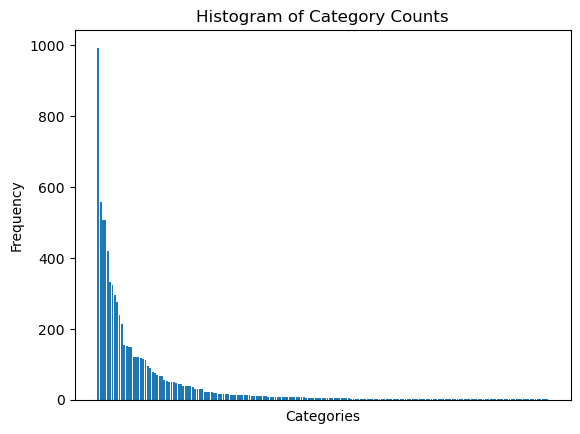

In [35]:
# Get value counts
value_counts = df_trimmed_train['Product'].value_counts()

# Plot histogram
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Category Counts')
# Turn off x-axis ticks
plt.xticks([])
plt.show()

**text clean-up**

In [73]:
df_trimmed_train.sample(15)

,Translation,Product,Issues
7136,ERP: Excel data source connection to ERP Database lost,MS EXCEL,CONNECTIVITY
7673,SAP : POB _ Process invoice from Exela (POB) and send via QOB all of them to KPMG,SAP,SEND RECEIVE
6104,WG: Klaus Bellmann ID does not work either (IF 802072 11368),KLAUS,NOT WORKING
3604,Remote Desktop App/Use of Teams in the Azure VM,MS TEAMS,OTHER
478,Win10 support,WINDOWS,INFO REQUEST GUIDANCE
8183,No access to SAP,SAP,ACCESS ISSUE
2361,dropped call,DROP CALL CHAT,DROP CALL CHAT
2752,Network Drive : Z drive : User Requested to map Z drive.,SHARED DRIVE,CONFIGURE
1122,Please check whether FEDEV12 is connected to SAP from your end,SAP,CONNECTIVITY
6730,SharePoint Team : I have granted access to Cole Foster (KID C00475) in One.ECM but he is receiving this error message,MS SHAREPOINT,ACCESS ISSUE


In [66]:
df_trimmed_train.columns

Index(['Translation ', 'Product', 'Issues'], dtype='object')

In [67]:
# Replace "||" with blank in the 'Text_Column'
df_trimmed_train['Translation '] = df_trimmed_train['Translation '].str.replace('||', '')

C:\Users\bhupe\AppData\Local\Temp\ipykernel_16588\3279671677.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trimmed_train['Translation '] = df_trimmed_train['Translation '].str.replace('||', '')
C:\Users\bhupe\AppData\Local\Temp\ipykernel_16588\3279671677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed_train['Translation '] = df_trimmed_train['Translation '].str.replace('||', '')


In [68]:
# Replace "//" with blank in the 'Translation' column
df_trimmed_train.loc[:, 'Translation '] = df_trimmed_train['Translation '].str.replace('//', '')


C:\Users\bhupe\AppData\Local\Temp\ipykernel_16588\3494894698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed_train.loc[:, 'Translation '] = df_trimmed_train['Translation '].str.replace('//', '')


In [69]:
import contractions

In [70]:
# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [71]:
# Apply contractions expansion on the 'Text_Column'
df_trimmed_train['Translation '] = df_trimmed_train['Translation '].apply(expand_contractions)

C:\Users\bhupe\AppData\Local\Temp\ipykernel_16588\351099706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed_train['Translation '] = df_trimmed_train['Translation '].apply(expand_contractions)


In [74]:
df_trimmed_train.Product.value_counts()

SAP               993
WINDOWS           556
KID               508
NETWORK           507
MS OUTLOOK        419
                 ... 
THERMOFLOW          1
FCR                 1
BCD                 1
PROMPT OPTIMIZ      1
BERAN               1
Name: Product, Length: 191, dtype: int64

In [75]:
# Get the value counts of the 'Product' column
product_counts = df_trimmed_train['Product'].value_counts()

In [76]:
# Filter the DataFrame to include only products with counts > 200
df_trimmed_counts_train = df_trimmed_train[df_trimmed_train['Product'].isin(product_counts[product_counts > 200].index)]

In [77]:
df_trimmed_counts_train.Product.value_counts()

SAP                 993
WINDOWS             556
KID                 508
NETWORK             507
MS OUTLOOK          419
PKI                 332
PRINTER             324
DROP CALL CHAT      296
SHARED DRIVE        274
ACTIVE DIRECTORY    240
IPHONE              213
Name: Product, dtype: int64

#### ML Model build

In [79]:
df_trimmed_counts_train.sample(5)

,Translation,Product,Issues
4438,HP SECUREPRINT,PRINTER,PRINT ISSUE
3736,MS Outlook: Outlook folder issue,MS OUTLOOK,ISSUE NOT MENTIONED
1730,DL: Cognizant email mapped to DLs,MS OUTLOOK,CONFIGURE
1086,SAP P81 Logon with password not possible,SAP,INITIAL PASSWORD
7491,Ariba: connection vendor 2487504 with Ariba,SAP,CONNECTIVITY


In [82]:
df_trimmed_counts_train.columns


Index(['Translation ', 'Product', 'Issues'], dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_trimmed_counts_train['Translation '], 
                                                    df_trimmed_counts_train['Product'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [85]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training text column
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing text column
X_test_vectorized = vectorizer.transform(X_test)

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

In [88]:
# Train the classifier
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [89]:
# Predict on the testing set
y_pred = nb_classifier.predict(X_test_vectorized)

In [90]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.909967845659164


In [92]:
confusion_matrix(y_test, y_pred)

array([[ 31,   0,   0,  20,   0,   1,   0,   0,   4,   0,   0],
       [  0,  68,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  34,   0,   4,   0,   1,   0,   0,   0,   2],
       [  0,   0,   0,  96,   0,   0,   0,   1,   2,   0,   0],
       [  0,   0,   0,   0,  78,   0,   0,   0,   1,   0,   1],
       [  0,   0,   1,   0,   0,  92,   1,   1,   3,   2,   1],
       [  0,   0,   1,   0,   1,   0,  61,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  61,   2,   2,   0],
       [  0,   0,   0,   3,   1,   0,   0,   0, 198,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   2,   1,  47,   1],
       [  2,   0,   0,   1,   2,   0,   2,   0,  12,   2,  83]],
      dtype=int64)

In [127]:
# Create a DataFrame containing X_test, y_test, and y_pred
incorrect_predictions_df = pd.DataFrame({'Text_Column': X_test[y_pred != y_test],
                                         'True_Label': y_test[y_pred != y_test],
                                         'Predicted_Label': y_pred[y_pred != y_test]})

incorrect_predictions_df

,Text_Column,True_Label,Predicted_Label
2502,WIN10 Support SAP error > DT,SAP,WINDOWS
7649,Agent workspace missing,WINDOWS,SAP
8056,Reinstall wifi driver,NETWORK,SHARED DRIVE
777,"Software The customer received a DELL laptop, SAP inaccessible",SAP,WINDOWS
8034,SEV 3: WLAN is not working at sites,NETWORK,SAP
...,...,...,...
833,Figures do not match in different reports,SAP,MS OUTLOOK
8094,Trading Floor Issue LAN is not working (Subnet failure),NETWORK,PRINTER
5843,Teams : User's colleague are unable to access teams in mobile app.,IPHONE,MS OUTLOOK
1210,The network printer has been switched,PRINTER,SHARED DRIVE


In [128]:
# Get the predicted probabilities for all samples
y_pred_proba = nb_classifier.predict_proba(X_test_vectorized)

In [129]:
# Get the predicted probabilities for incorrectly predicted samples
y_pred_proba_incorrect = y_pred_proba[y_pred != y_test]

In [130]:
# Create DataFrame for predicted probabilities with columns as class labels
predicted_proba_incorrect_df = pd.DataFrame(y_pred_proba_incorrect, columns=nb_classifier.classes_)
predicted_proba_incorrect_df

,ACTIVE DIRECTORY,DROP CALL CHAT,IPHONE,KID,MS OUTLOOK,NETWORK,PKI,PRINTER,SAP,SHARED DRIVE,WINDOWS
0,0.000001,0.000003,0.000014,0.000001,0.000270,0.000002,0.000008,0.000052,0.172735,0.000004,0.826910
1,0.021393,0.028367,0.017473,0.052846,0.166779,0.012006,0.039925,0.109943,0.458333,0.051069,0.041866
2,0.007413,0.009830,0.006055,0.004578,0.009632,0.386920,0.006918,0.032656,0.009626,0.519117,0.007254
3,0.000419,0.000155,0.000603,0.000003,0.002660,0.000002,0.001040,0.001156,0.240241,0.000467,0.753254
4,0.000519,0.000056,0.006616,0.004614,0.213876,0.109712,0.017581,0.234835,0.274252,0.117414,0.020525
...,...,...,...,...,...,...,...,...,...,...,...
79,0.000371,0.000229,0.001292,0.003683,0.611711,0.000524,0.005386,0.206951,0.098010,0.033282,0.038562
80,0.000115,0.000025,0.001394,0.002323,0.088831,0.006962,0.026697,0.650114,0.172718,0.044996,0.005826
81,0.000000,0.000000,0.000079,0.000344,0.999105,0.000000,0.000003,0.000000,0.000383,0.000053,0.000034
82,0.001486,0.001725,0.003495,0.001869,0.006825,0.003415,0.002293,0.435907,0.005759,0.533643,0.003581


In [131]:
# Reset index for X_test to align with the predicted probabilities DataFrame
X_test_incorrect_reset_index = X_test[y_pred != y_test].reset_index(drop=True)
X_test_incorrect_reset_index

0                                        WIN10 Support  SAP error  >  DT
1                                                Agent workspace missing
2                                                  Reinstall wifi driver
3         Software The customer received a DELL laptop, SAP inaccessible
4                                  SEV 3:   WLAN is not working at sites
                                     ...                                
79                             Figures do not match in different reports
80             Trading Floor Issue   LAN is not working (Subnet failure)
81    Teams : User's colleague are unable to access teams in mobile app.
82                                 The network printer has been switched
83                                         Laptop does not start at all.
Name: Translation , Length: 84, dtype: object

In [134]:
# Merge incorrect_predictions_df with predicted_proba_df based on index
merged_incorrect_df = pd.concat([incorrect_predictions_df.reset_index(drop=True), predicted_proba_incorrect_df.reset_index(drop=True)], axis=1)

merged_incorrect_df

,Text_Column,True_Label,Predicted_Label,ACTIVE DIRECTORY,DROP CALL CHAT,IPHONE,KID,MS OUTLOOK,NETWORK,PKI,PRINTER,SAP,SHARED DRIVE,WINDOWS
0,WIN10 Support SAP error > DT,SAP,WINDOWS,0.000001,0.000003,0.000014,0.000001,0.000270,0.000002,0.000008,0.000052,0.172735,0.000004,0.826910
1,Agent workspace missing,WINDOWS,SAP,0.021393,0.028367,0.017473,0.052846,0.166779,0.012006,0.039925,0.109943,0.458333,0.051069,0.041866
2,Reinstall wifi driver,NETWORK,SHARED DRIVE,0.007413,0.009830,0.006055,0.004578,0.009632,0.386920,0.006918,0.032656,0.009626,0.519117,0.007254
3,"Software The customer received a DELL laptop, SAP inaccessible",SAP,WINDOWS,0.000419,0.000155,0.000603,0.000003,0.002660,0.000002,0.001040,0.001156,0.240241,0.000467,0.753254
4,SEV 3: WLAN is not working at sites,NETWORK,SAP,0.000519,0.000056,0.006616,0.004614,0.213876,0.109712,0.017581,0.234835,0.274252,0.117414,0.020525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Figures do not match in different reports,SAP,MS OUTLOOK,0.000371,0.000229,0.001292,0.003683,0.611711,0.000524,0.005386,0.206951,0.098010,0.033282,0.038562
80,Trading Floor Issue LAN is not working (Subnet failure),NETWORK,PRINTER,0.000115,0.000025,0.001394,0.002323,0.088831,0.006962,0.026697,0.650114,0.172718,0.044996,0.005826
81,Teams : User's colleague are unable to access teams in mobile app.,IPHONE,MS OUTLOOK,0.000000,0.000000,0.000079,0.000344,0.999105,0.000000,0.000003,0.000000,0.000383,0.000053,0.000034
82,The network printer has been switched,PRINTER,SHARED DRIVE,0.001486,0.001725,0.003495,0.001869,0.006825,0.003415,0.002293,0.435907,0.005759,0.533643,0.003581


In [141]:
# Set display format for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Function to apply styling to cells based on their values
def highlight_greater_than(value):
    color = 'green' if value > 0.01 else 'black'
    return 'color: %s' % color

In [142]:
# Apply styling to the DataFrame
styled_merged_incorrect_df = merged_incorrect_df.style.applymap(highlight_greater_than, subset=predicted_proba_incorrect_df.columns)

# Display the styled DataFrame
styled_merged_incorrect_df


,Text_Column,True_Label,Predicted_Label,ACTIVE DIRECTORY,DROP CALL CHAT,IPHONE,KID,MS OUTLOOK,NETWORK,PKI,PRINTER,SAP,SHARED DRIVE,WINDOWS
0,WIN10 Support SAP error > DT,SAP,WINDOWS,0.000001,0.000003,0.000014,0.000001,0.000270,0.000002,0.000008,0.000052,0.172735,0.000004,0.826910
1,Agent workspace missing,WINDOWS,SAP,0.021393,0.028367,0.017473,0.052846,0.166779,0.012006,0.039925,0.109943,0.458333,0.051069,0.041866
2,Reinstall wifi driver,NETWORK,SHARED DRIVE,0.007413,0.009830,0.006055,0.004578,0.009632,0.386920,0.006918,0.032656,0.009626,0.519117,0.007254
3,"Software The customer received a DELL laptop, SAP inaccessible",SAP,WINDOWS,0.000419,0.000155,0.000603,0.000003,0.002660,0.000002,0.001040,0.001156,0.240241,0.000467,0.753254
4,SEV 3: WLAN is not working at sites,NETWORK,SAP,0.000519,0.000056,0.006616,0.004614,0.213876,0.109712,0.017581,0.234835,0.274252,0.117414,0.020525
5,WIN10 Support ScantoMail > DT,MS OUTLOOK,WINDOWS,0.000005,0.000014,0.000083,0.000007,0.000405,0.000020,0.000005,0.000023,0.000109,0.000008,0.999321
6,"Initial password : User is new to , need initial password .",ACTIVE DIRECTORY,KID,0.076555,0.000000,0.000000,0.923116,0.000000,0.000000,0.000000,0.000000,0.000329,0.000000,0.000000
7,Certificate issue.,WINDOWS,PKI,0.002705,0.007014,0.002311,0.017922,0.079603,0.034558,0.539446,0.032075,0.224094,0.009907,0.050366
8,Fiori HTTP Status 500,SAP,KID,0.006870,0.009109,0.033665,0.458171,0.004463,0.001285,0.006410,0.015130,0.445987,0.005466,0.013444
9,"Unable to connect HP 19"" monitor to docking station",WINDOWS,SHARED DRIVE,0.000000,0.000000,0.000082,0.000115,0.000761,0.000035,0.000355,0.008663,0.013075,0.602244,0.374669
